## Análise de RH - Saída de funcionários

---

Muitas vezes os gestores se concentram tanto em suas gestões que acabam esquecendo de considerar um cálculo muito impactante para as contas da empresa, que é saber quanto custa demitir um funcionário e/ou treinar um novo.

A estratégia a ser adotada pelo empreendedor é selecionando o candidato mais adequado para a vaga e manter o funcionário contente com a organização, de forma que ele permaneça na empresa por longa data e tenha interesse de fazê-la desenvolver. Assim ele retém os talentos e reduz os custos indiretos.

## Checklist das Etapas

1. Definindo o problema.
2. Captação dos dados.
3. Análise exploratória dos dados.
4. Preparação dos dados.
5. Construção do modelo de Machine Learning.
6. Avaliação do modelo.

## 1. Definindo o problema.

O desligamento ou saída de um funcionário da empresa não é tarefa fácil. Esse momento delicado pode não só impactar na produtividade da empresa e na sua imagem no mercado, mas também afetá-la financeiramente. Isso porque os custos de uma demissão e treinamento de um novo colaborador não são baixos. 

No Brasil, os custos de uma demissão, assim como todos os encargos da folha de pagamento, são muito onerosos para a empresa. Seja em demissões por justa causa ou sem justa causa, o colaborador precisa ter seus direitos respeitados perante a lei.

Já que uma demissão traz consigo o pagamento de valores como de férias, décimo terceiro, aviso prévio, FGTS e etc. Já a saída de um colaborador custa tempo de treinamento do novo funcionário e o tempo gasto com esse colaborador que está de saída.

### Objetivo

O objetivo é diminuir o gasto com colaboradores que queiram sair da empresa.

Queremos prever se um funcionário está incomodado ou desgastado com a empresa fazendo-o pensar em mudar de emprego.

Possuimos um Dataset no qual está disponível vários dados dos funcionários de uma empresa e com isso, tentar prever a situação do colaborador a fim de cortar esses gastos com demissão.

## 2. Caletando os dados.

Dados disponibilizados pelo Kaggle, que estão acessível [neste link](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) e no meu Github [nesse link](https://github.com/rodrigogaf01/RH-Analise-e-Classificacao/blob/main/Human_Resources.csv).

In [1]:
# Importando os pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando os dados
raw_df= pd.read_csv('Human_Resources.csv')
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print('O Dataset possui {} linhas.'.format(raw_df.shape[0]))
print('O Dataset possui {} colunas.'.format(raw_df.shape[1]))

O Dataset possui 1470 linhas.
O Dataset possui 35 colunas.


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
raw_df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
# Quantidade de valores nulos em cada coluna
raw_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Informações sobre as colunas
for i in raw_df.columns:
    print(i)
    print('Tipo:', raw_df[i].dtype)
    print('Os valores únicos são : {}'.format(raw_df[i].unique()))
    print('-'*100)

Age
Tipo: int64
Os valores únicos são : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
----------------------------------------------------------------------------------------------------
Attrition
Tipo: object
Os valores únicos são : ['Yes' 'No']
----------------------------------------------------------------------------------------------------
BusinessTravel
Tipo: object
Os valores únicos são : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------------------------------------------------------------------
DailyRate
Tipo: int64
Os valores únicos são : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  

### Insights

- Já conseguimos observar que as colunas ```['EmployeeCount', 'Over18', 'StandardHours']``` possuem apenas um valor, sendo assim, não serã úteis para o projeto.
- A coluna ```EmployeeNumber``` é o identificador de cada funcionário, não sendo relevante para a nossa análise e modelo.

In [8]:
df= raw_df.drop(columns= ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

## 3. Análise exploratória dos dados

Na análise inicial, toda variável deve ser estudada. É importante analisar o nome, tipo, valores faltantes, presença de outliers e o tipo de distribuição.

Como esse projeto é um caso de Aprendizado Supervisionado de classificação. A coluna ````['Attrition']````será definida como variável alvo tendo em vista que o modelo criado irá tentar prever se um funcionário tem um tendência de sair da empresa.

### Variáveis

* **Age** : Idade dos funcionários
* **Attrition** : Caso o funcionário esteja desgastado na empresa
* **BusinessTravel** : Se o funcionário viaja pela empresa
* **DailyRate** : Coeficiente diário do salário
* **Department** : Departamento da empresa em que o funcionário trabalha
* **DistanceFromHome** : Distância do funcionário em Kilômetros da empresa
* **Education** : Nível de educação
    * 1 'Below College'
    * 2 'College'
    * 3 'Bachelor'
    * 4 'Master'
    * 5 'Doctor
* **EducationField** : Área do funcionário
* **EnvironmentSatisfaction** : O quanto está satisfeito com o ambiente de trabalho
    * 1 'Low'
    * 2 'Medium'
    * 3 'High'
    * 4 'Very High'
* **Gender** : Gênero
* **HourlyRate** : Número de horas trabalhadas
* **JobInvolvement** : Envolvimento no Trabalho
    * 1 'Low'
    * 2 'Medium'
    * 3 'High'
    * 4 'Very High'
* **JobLevel** : Posição hierárquica da função do funcionário
* **JobRole** : Função do funcionário
* **JobSatisfaction** : Satisfação do trabalho
    * 1 'Low'
    * 2 'Medium'
    * 3 'High'
    * 4 'Very High'
* **MaritalStatus** : Estado civil
* **MonthlyIncome** : Renda Mensal
* **MonthlyRate** : Coeficiente Mensal do salário
* **NumCompaniesWorked** :  Número de empresas que o funcionário já trabalhou
* **OverTime** : Hora extra
* **PercentSalaryHike** : Porcentagem de aumento
* **PerformanceRating** : Nota da performace
    * 1 'Low'
    * 2 'Good'
    * 3 'Excellent'
    * 4 'Outstanding'
* **RelationshipSatisfaction** : Satisfação do funcionário
    * 1 'Low'
    * 2 'Medium'
    * 3 'High'
    * 4 'Very High'
* **StockOptionLevel** : Desconto para comprar ações da empresa
* **TotalWorkingYears** : Quantos anos o funcionário está no mercado de trabalho
* **TrainingTimesLastYear** : O quanto de horas foram gastos com treinamento com esse funcionário
* **WorkLifeBalance** : Balanço da vida do funcionário quanto pessoal e profissional
    * 1 'Bad'
    * 2 'Good'
    * 3 'Better'
    * 4 'Best'
* **YearsAtCompany** Quantos anos o funcionário está trabalhando na empresa
* **YearsInCurrentRole** : Anos na função atual
* **YearsSinceLastPromotion** : Anos da última promoção
* **YearsWithCurrManager** : Anos com o atual chefe

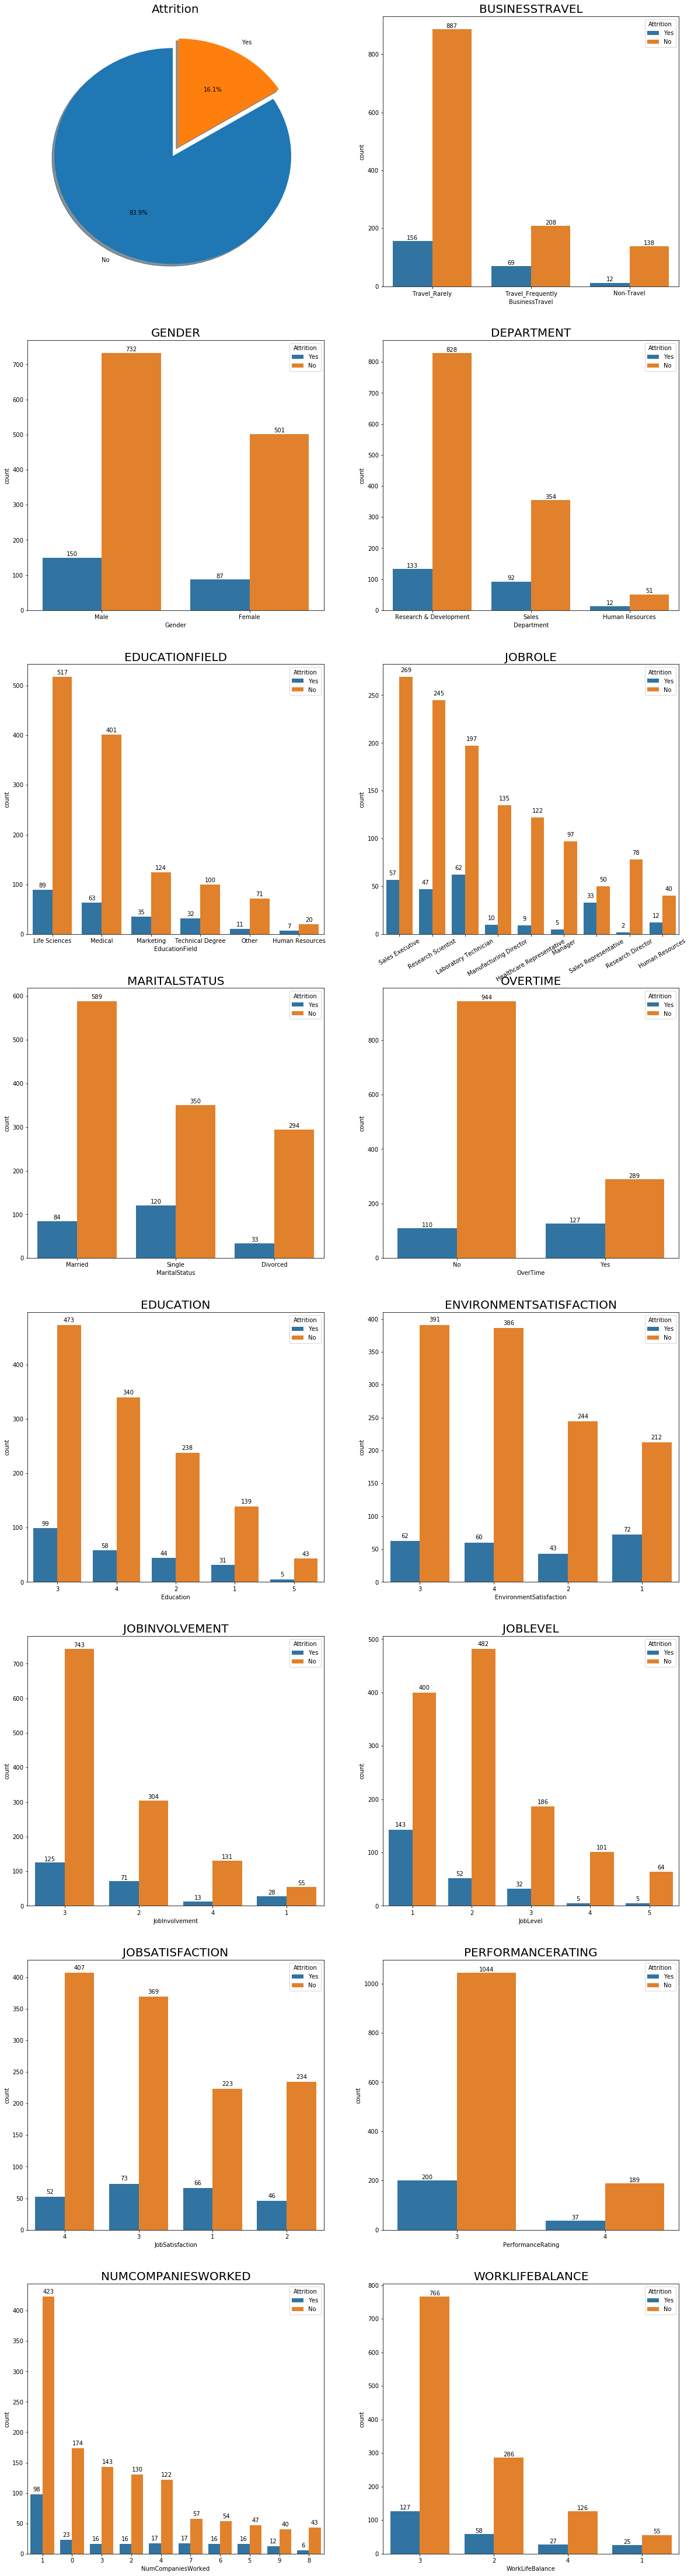

In [9]:
plt.figure(figsize= (20, 80))

lista= ['BusinessTravel', 'Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime',
       'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
        'NumCompaniesWorked', 'WorkLifeBalance']

# Gráfico de Pizza para a variável alvo(Attrition)
plt.subplot(8, 2, 1)
plt.pie(x= df.Attrition.value_counts(), labels= df.Attrition.value_counts().index, explode= [0.05, 0.05],
       autopct= '%1.1f%%', startangle= 90, shadow= True)
plt.title('Attrition', fontsize= 20)

# Gráficos de barra dos demais

total_size= len(df)
n= 2
for i in lista:
    plt.subplot(8, 2, n)
    ax= sns.countplot(x= i, data= df, hue= 'Attrition', order= df[i].value_counts().index)
    plt.title(i.upper(), fontsize= 20)
    
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width() 
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord + width/2.0, 
                height+5, 
                height , 
                ha='center') 
    if i == 'JobRole':
        plt.xticks(rotation= 30)
        plt.xlabel('')
        
        
    n+= 1

### Insights

- O dataset está desbalanceado, ou seja, possui muito mais 'No'(84%) do que 'Yes'(16%) na variável alvo(Attrition).
- No gráfico da variável 'Jobrole' que nos mostra o cargo do funcionário na empresa, observamos que os que possuem a função de 'Sales Representative' têm a tendência de saída da empresa de quase 50%. As causas podem ser o salário, benefícios, condição de trabalho, entre outros.

- No gráfico de 'Overtime', observamos uma proporção bem maior do desgaste nos funcionário que fazem hora extra.

- No 'Enviromentsatisfaction' e 'Jobsatisfaction' a proporção de desgaste também aumenta consideravelmente conforme o nível de satisfação de ambos diminui. 

- A relação das outras variáveis com o desgaste dos funcionários parecem estar dentro de um padrão ou a diferença é pequena.

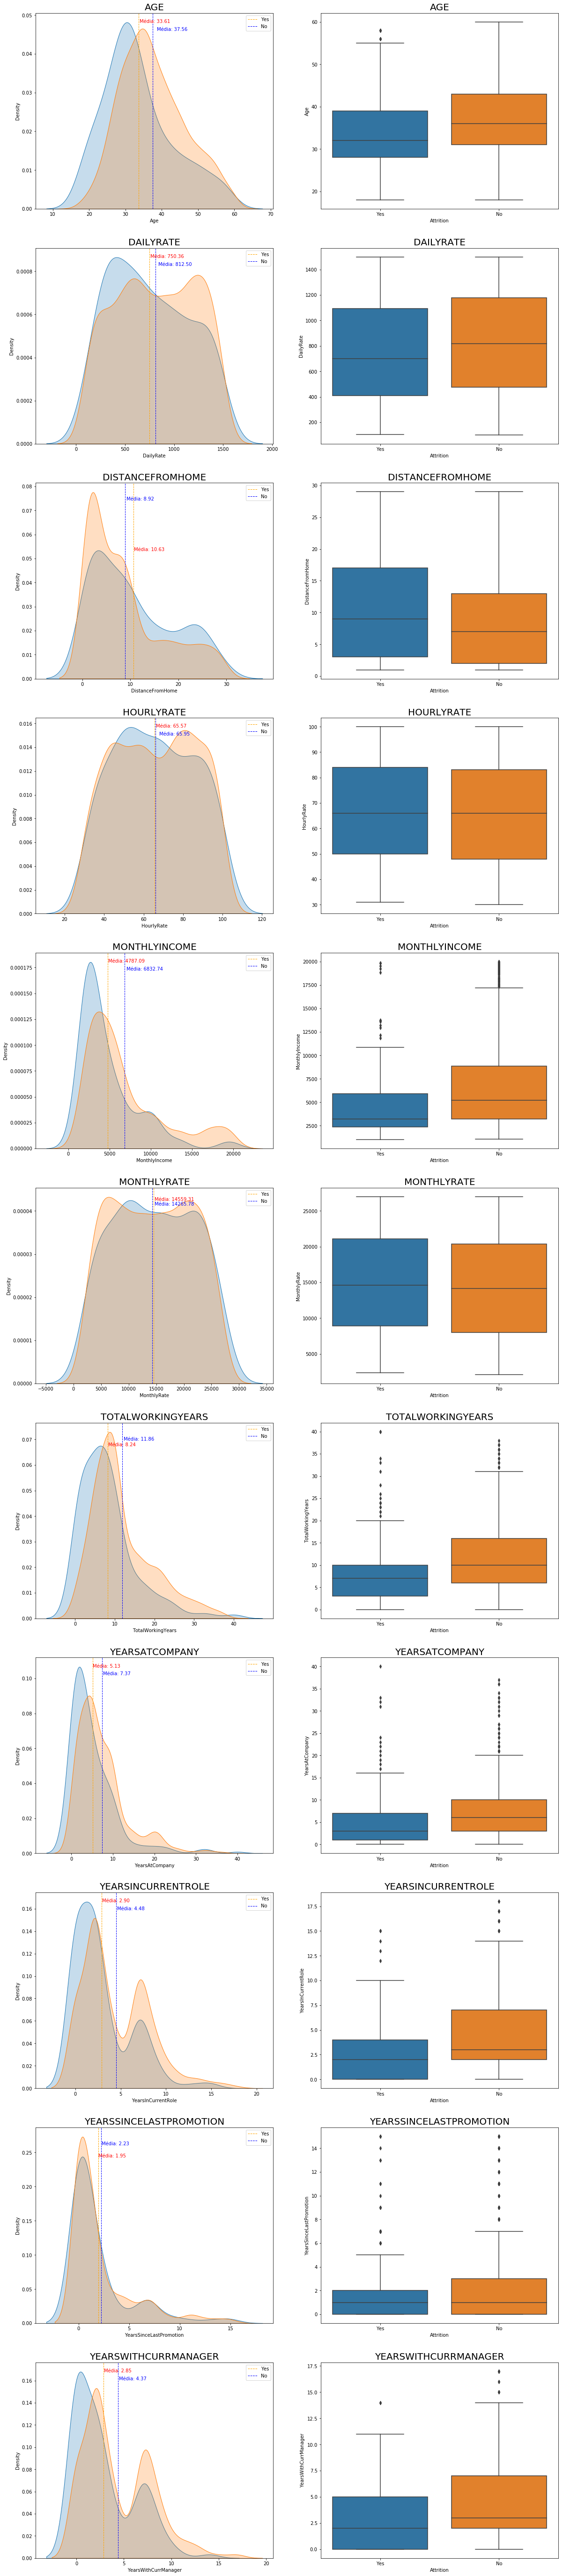

In [10]:
# Separando o dataset pelos dois valores de 'Attrition'
yes_df= df[df['Attrition'] == 'Yes']
no_df= df[df['Attrition'] == 'No']


plt.figure(figsize= (20, 100))

lista2= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears',
         'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

n= 1
for i in lista2:
    plt.subplot(11, 2, n)
    
    # Kdeplot para Attrition = 'Yes'
    ax= sns.kdeplot(x= i, data= yes_df, shade= True)
    plt.axvline(yes_df[i].mean(), color='orange', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(yes_df[i].mean()*1.01, max_ylim*0.95, 'Média: {:.2f}'.format(yes_df[i].mean()), color= 'red')
    
    # Kdeplot para Attrition = 'No'
    ax= sns.kdeplot(x= i, data= no_df, shade= True)
    plt.axvline(no_df[i].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.title(i.upper(), fontsize= 20)
    min_ylim, max_ylim = plt.ylim()
    plt.text(no_df[i].mean()*1.03, max_ylim*0.91, 'Média: {:.2f}'.format(no_df[i].mean()), color= 'blue')
    
    plt.legend(['Yes', 'No'])
    n+= 1
    
    # Boxplot
    plt.subplot(11, 2, n)
    sns.boxplot(x= 'Attrition', y= i, data= df)
    plt.title(i.upper(), fontsize= 20)
    n+= 1

### Insights

- Observamos que em referência às variáveis acima, em geral, temos um padrão de comportamento iguais tanto quando o funcionário tem tendência em sair quanto não.
- Quanto menos a renda mensal do funcionário, maior a tendência em sair.
- Notamos pequenas diferenças como por exemplo na idade, onde as pessoas um pouco mais jovens tem a tendência de sair.
- Outro exemplo é quanto maior a distância do trabalho, maior é a tendência do funcionário sair e menor quando a distância diminui.
- Visualizando os boxplots, conseguimos identificar outliers em alguns gráficos, porém não parecem estar fora do normal.

Text(0.5,1,'Renda Mensal por Função')

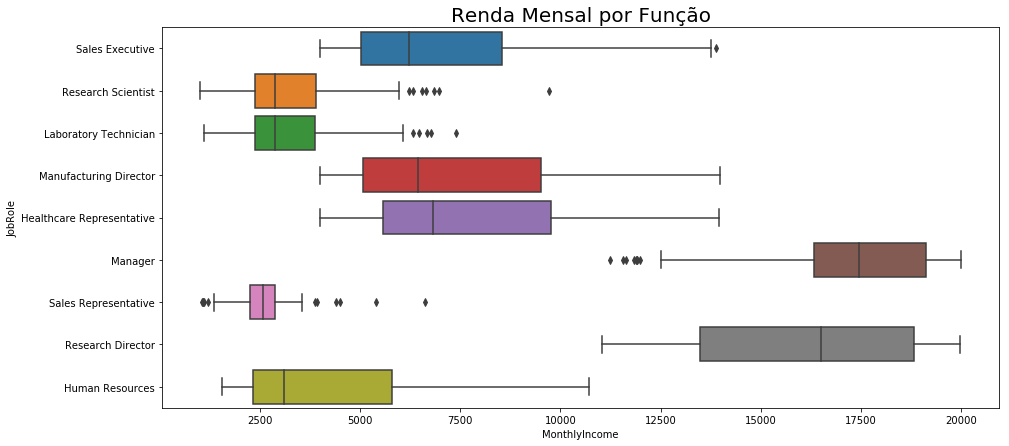

In [11]:
plt.figure(figsize= (15, 7))
sns.boxplot(x= 'MonthlyIncome', y= 'JobRole', data= df)
plt.title('Renda Mensal por Função', fontsize= 20)

# Com o gráfico abaixo, observamos que a hipótese de que os funcionários com a função Sales Representative
# possuirem menores salários foi validada, o que pode ser o maior influenciador para o desgaste.

### Matriz de Correlação

In [12]:
# Transformando a variável Attrition para valores numéricos para ver a correlação dela com as outras variáveis.
df['Attrition']= df['Attrition'].map({'Yes': 1, 'No': 0})

Text(0.5,1,'Matriz de Correlação')

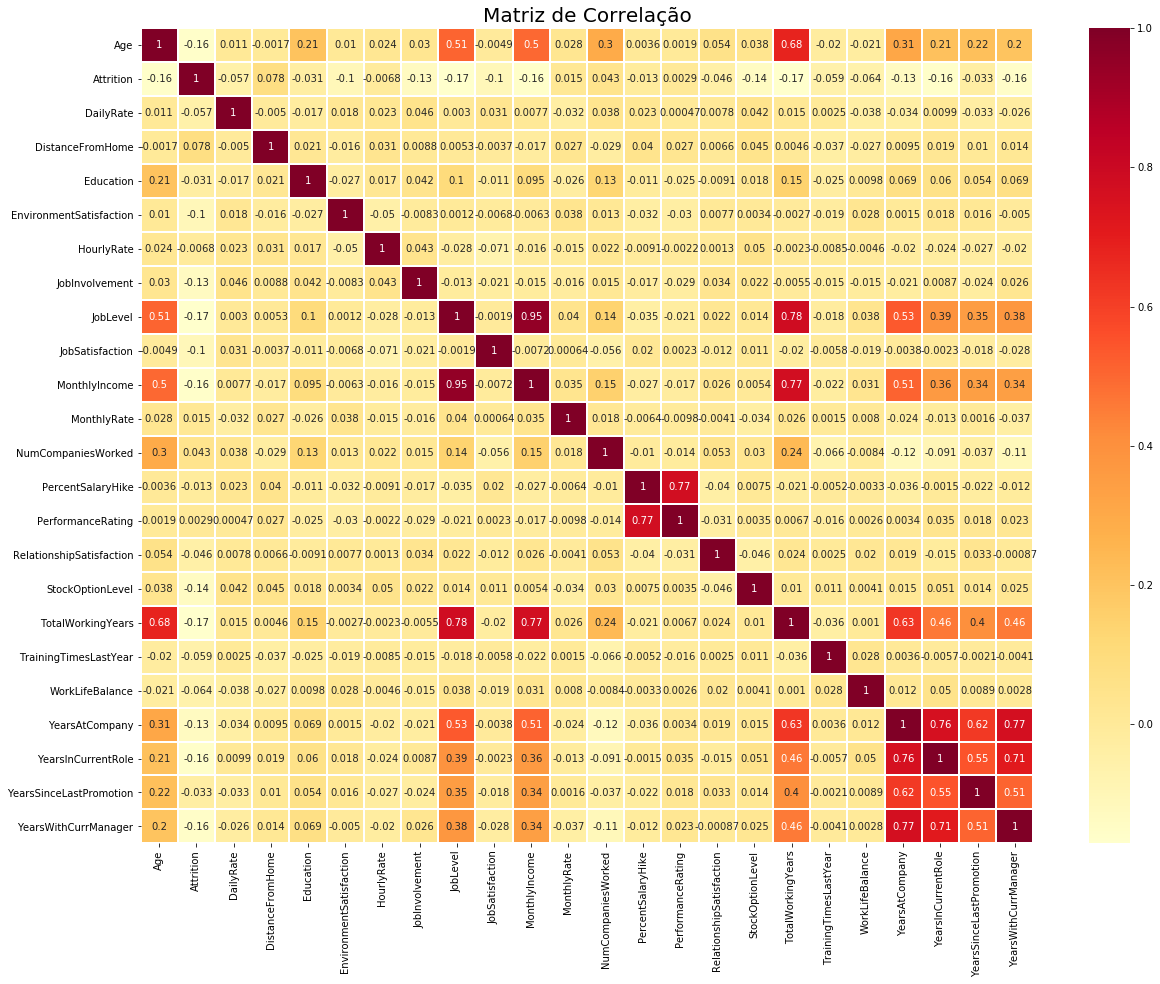

In [13]:
corr= df.corr()

plt.figure(figsize= (20, 15))
sns.heatmap(corr, annot= True, linewidths= 1, cmap= 'YlOrRd')
plt.title('Matriz de Correlação', fontsize= 20)

### Insights

- A renda mensal (MonthlyIncome) possui uma correlação quase perfeita com o Posição da função do funcionário(Joblevel), o que era esperado pois quanto maior a posição na hierarquia de uma empresa, maior será o salário.
- A nota que um funcionário recebeu pela performace(PerfomanceRating) tem grande correlação com a porcentagem de aumento no salário(PercentSalaryHyde), o que faz total sentido, tendo em vista que faz parte as empresas darem uma premiação, fidelização, etc para os funcionários mais produtivos e talentosos.
- O total de anos trabalhado(TotalWorkingYears) possui alta correlação com a idade(Age), Posição da função do funcionário(Joblevel) e Renda mensal(MonthlyIncome). Também já era esperado pois, conforme se vai adquirindo mais experiência, a pessoa fica mais velha e também a tendência é a renda mensal aumentar.
- Alta correlação também entre Anos do funcionário na função(YearinCurrentRole) e anos na empresa(YearAtCompany).
- Por último, vemos uma alta correlação entre anos com o mesmo gestor(YearsWithCurrManager) e anos na empresa(YearsAtCompany) e também com anos na mesma função(YearsInCurrRole).

## 4. Preparação dos dados

### Pré - processamento

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
from sklearn.preprocessing import OneHotEncoder

# As variáveis abaixo são classificadas como variáveis ordinais, ou seja, possui uma ordenação.
df_ord= df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
           'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
           'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
           'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# As variáveis abaixo são classificadas como variáveis nominais, ou seja, não existe nenhuma ordenação.
df_nom= df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]

# Criaremos colunas identificando cada uma das variáveis nominais
encoder= OneHotEncoder()
df_nom= encoder.fit_transform(df_nom).toarray()
df_nom= pd.DataFrame(df_nom)

# Visualizando os dois DataFrames
display(df_ord.head())
display(df_nom.head())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
# Agora vamos concatenar os dois DataFrames
df_final= pd.concat([df_ord, df_nom], axis= 1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,18,19,20,21,22,23,24,25,26,27
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
# Chegou o momento que iremos escalar os dados do DataFrame
# Utilizaremos o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
df_scaled= scaler.fit_transform(df_final)

In [18]:
df_scaled

array([[0.54761905, 0.71581961, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

### Separando o dataset em Treino e Teste
Para que possamos fazer previsões, precisamos separar o nosso conjunto de dados entre treino e teste.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Definindo semente global
seed= 123
np.random.seed(seed)

x= df_scaled
y= df['Attrition']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)

## 5. Construção do modelo de Machine Learning

Após entendermos melhor nossos dados, a realidade da empresa e prepararmos nossos dados, é hora de utilizarmos Machine Learning para fazer previsões que podem nos ajudar a prever saída ou não do funcionário.

Para isso, avaliaremos a accurácia de 5 modelos diferentes de Machine Learning:

>* DecisionTree
>* RandomForest
>* AdaBoost
>* KNeighbors
>* SVC



### Validação Cruzada(Cross-Validation)

Para o resultado ser fiel a realidade e não ficar refém da sorte de uma aleatóriedade, utilizaremos validação cruzada. Para saber mais como funciona essa técnica, leia [este artigo](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o.).

Nesse projeto iremos utilizar o KFold com o numero de folders igual a 10.

In [20]:
# Importando os modelos para comparação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
models= []

models.append(['DecisionTree', DecisionTreeClassifier()])
models.append(['RandomForest', RandomForestClassifier()])
models.append(['AdaBoost', AdaBoostClassifier()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['SVC', SVC()])

models

[['DecisionTree', DecisionTreeClassifier()],
 ['RandomForest', RandomForestClassifier()],
 ['AdaBoost', AdaBoostClassifier()],
 ['KNeighbors', KNeighborsClassifier()],
 ['SVC', SVC()]]

In [22]:
# Semente global
np.random.seed(seed)

# Criando listas para a geração do gráfico de comparação dos modelos.
names= []
results= []

for name, model in models:
    kfold= KFold(n_splits= 10, shuffle= True)
    cv_results= cross_val_score(estimator= model, X= x_train, y= y_train, cv= kfold)*100
    
    mean= cv_results.mean()
    std= cv_results.std()
    print('{:16} : Accurácia média {:.2f}% - Desvio Padrão médio {:.2f}%'.format(name, mean, std))
    
    names.append(name)
    results.append(cv_results)

DecisionTree     : Accurácia média 76.87% - Desvio Padrão médio 1.85%
RandomForest     : Accurácia média 84.16% - Desvio Padrão médio 3.51%
AdaBoost         : Accurácia média 84.94% - Desvio Padrão médio 1.76%
KNeighbors       : Accurácia média 83.09% - Desvio Padrão médio 2.13%
SVC              : Accurácia média 84.54% - Desvio Padrão médio 3.31%


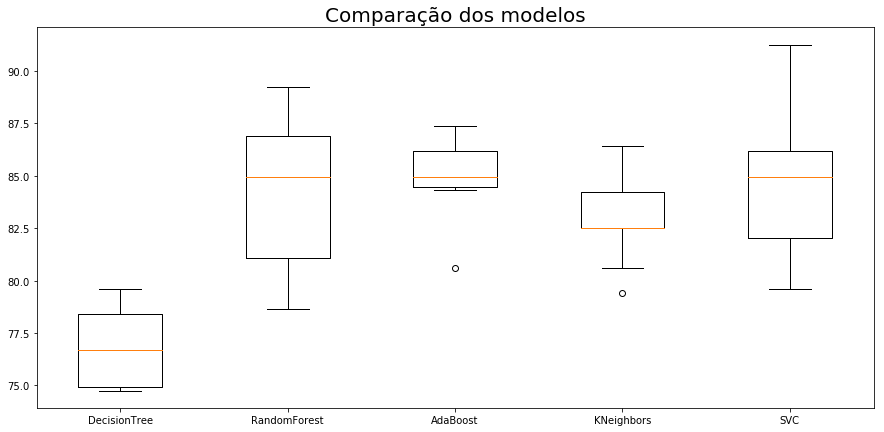

In [23]:
plt.figure(figsize= (15,7))
plt.boxplot(x= results, labels= names)
plt.title('Comparação dos modelos', fontsize= 20)

plt.show()

### Avaliação dos resultados

Analisando os resultados, vemos que o modelo mais prolífico é o AdaBoost.

### AdaBoost

In [24]:
# Treinando o modelo com dados de teste

modelo= AdaBoostClassifier()
modelo.fit(x_train, y_train)

# Prevendo os valores de Y pelos dados de teste X
y_prev= modelo.predict(x_test)

In [25]:
from sklearn.metrics import classification_report

# imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_prev, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9370    0.9688    0.9526       384
           1     0.7273    0.5614    0.6337        57

    accuracy                         0.9161       441
   macro avg     0.8322    0.7651    0.7931       441
weighted avg     0.9099    0.9161    0.9114       441



Text(0.5,1,'Matriz de Confusão')

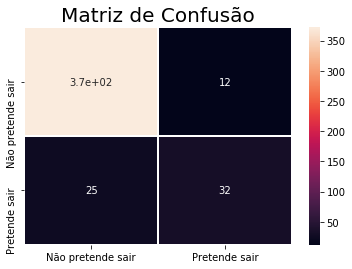

In [26]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_prev)

sns.heatmap(cm, annot= True, linewidths= 1, xticklabels= ['Não pretende sair', 'Pretende sair'], 
            yticklabels= ['Não pretende sair', 'Pretende sair'])
plt.title('Matriz de Confusão', fontsize= 20)

## Conclusão

Com o nosso modelo AdaBoost conseguimos uma acurácia de 91,6% nos dados de treino, o que é um número bastante expressivo, porém quando nos deparamos com um Dataset não balanceado, ou seja, a variável alvo não possui um número equilibrado das saídas(nesse projeto temos 84% de 'No' e 16% de 'Yes') além de olhar a acurácia, devemos levar em consideração o recall e a precisão.


O nosso objetivo principal nesse projeto é a predição do caso de um funcionário queira sair da empresa. Então nós devemos nos espelhar no resultado que nos diz o quanto o modelo acertou essa predição, que é o Recall.


Analisando o classification report e a matriz de confusão percebemos que o nosso Recall foi de 56% (Número que acertamos o atrito dos funcionários(32) / Total dos funcionários que querem sair(57)).


Logo, podemos afirmar que o nosso modelo acerta 91% dos resultados, porém acerta 56% daqueles que desejam sair.